加载需要用到的python库

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

%matplotlib inline

加载数据集

In [16]:
dataset_root = Path('dataset')
train_path = dataset_root / 'train'
test_path = dataset_root / 'test'
csv_path = dataset_root / 'driver_imgs_list.csv'

# 读取csv文件
dataset = pd.read_csv(csv_path)

# 查看csv文件的前5项
dataset.head()

,subject,classname,img
0,p002,c0,img_44733.jpg
1,p002,c0,img_72999.jpg
2,p002,c0,img_25094.jpg
3,p002,c0,img_69092.jpg
4,p002,c0,img_92629.jpg


In [20]:
count_subject = len(dataset['subject'].unique())
count_train_img = len(dataset['img'])
print('amount of diver: {}'.format(count_subject))
print('amount of train img: {}'.format(count_train_img))

amount of diver: 26
amount of train img: 22424


我们可以看到被标注的图片总数有2万多张，但是司机的数量只有26位。也就是说，如果随机分割训练集和验证集，会出现过拟合的现象，为了更好的训练和评估模型，我选择按照司机来分割训练集和验证集，接下来，我们看一下数据集的分布。

(array([  1.,   0.,   2.,   1.,   4.,  10.,   1.,   2.,   1.,   4.]),
 array([  346. ,   435.1,   524.2,   613.3,   702.4,   791.5,   880.6,
          969.7,  1058.8,  1147.9,  1237. ]),
 <a list of 10 Patch objects>)

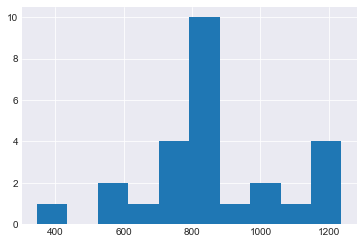

In [77]:
sns.set_style('darkgrid')

img_per_subject = dataset.groupby('subject')['img'].count()
bar_positions = np.arange(400,1400,100)
plt.hist(img_per_subject)